In [50]:
import sys

# sys.path.clear()  # Clear all paths
# sys.path.remove('./path/to/remove') # Remove a selected path

# Basepath
basepath = "../"  # Project directory
sys.path.append(basepath)
sys.path.append(basepath + "server_files/ml_group/course.lib")

# Data
DATA_PATH = basepath + "data"

# Figure
FIGURE_PATH = basepath + "figures/04_al_figures"

# Modelpath
MODEL_PATH = basepath + "models"

# Path to environment
ENV_PATH = "/home/fhwn.ac.at/202375/.conda/envs/thesis/lib"

# Resultspath
RESULTS_PATH = basepath + "results/03_modeling_results"

# AL Scripts
AL_SCRIPTS_PATH = basepath + "al_scripts"

# Add the paths
sys.path.extend(
    {DATA_PATH, FIGURE_PATH, MODEL_PATH, ENV_PATH, RESULTS_PATH, AL_SCRIPTS_PATH}
)

# remove a selected path
# sys.path.remove('')

sys.path  # Check if the path is correct

['/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python312.zip',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/lib-dynload',
 '',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages',
 './',
 './server_files/ml_group/course.lib',
 './data',
 './figures/04_al_figures',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 './results/03_modeling_results',
 './models',
 './al_scripts',
 '../',
 '../server_files/ml_group/course.lib',
 '../models',
 '../al_scripts',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 '../results/03_modeling_results',
 '../data',
 '../figures/04_al_figures',
 '../',
 '../server_files/ml_group/course.lib',
 '../models',
 '../al_scripts',
 '/home/fhwn.ac.at/202375/.conda/envs/thesis/lib',
 '../results/03_modeling_results',
 '../data',
 '../figures/04_al_figures',
 '../',
 '../server_files/ml_group/course.lib',
 '../models',
 '../al_scripts',
 '/home/fhwn.ac.at/20237

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge as KRR
import pandas as pd

In [52]:
data_small = pd.read_csv(
    basepath + "data/dps1200.csv", sep=",", decimal=".", encoding="utf-8"
)
# correct the column names
data_small = data_small.rename(columns=lambda x: x.replace("X", ""))

# data_small.head()

In [53]:
# Define generarl settings

# Switch for the dataset
# Select from (data_1200, data_full) or other if implemented
data = data_small

# Switch for testing mode (use only 10% of the data, among others)
testing = True

# Define a random state for randomized processes
# random_state = np.random.RandomState(202375)
random_state = 202375

# Define a metric for model evaluation
cv_scorer = "neg_mean_squared_error"

######################################################
if testing == True:
    n_jobs = 20
    print("Testing mode for Cross Validation")
    print("consider Splitting the data for faster modelling")
else:
    n_jobs = 40
    print("Extensive mode for Cross Validation")
######################################################

Testing mode for Cross Validation
consider Splitting the data for faster modelling


In [54]:
data_small

,Unnamed: 0,year,tree,Origin,type,2970,2968,2966,2964,2962,...,818,816,814,812,810,808,806,804,802,800
0,2GOS-18_1955,1955,2GOS-18,POL,living,0.019849,0.020121,0.020414,0.020724,0.021030,...,-0.023469,-0.023367,-0.023283,-0.023220,-0.023183,-0.023174,-0.023190,-0.023228,-0.023293,-0.023388
1,2GOS-18_1969,1969,2GOS-18,POL,living,0.023933,0.024378,0.024827,0.025273,0.025712,...,-0.024117,-0.024076,-0.024043,-0.024021,-0.024015,-0.024033,-0.024077,-0.024147,-0.024238,-0.024346
2,2GOS-18_1974,1974,2GOS-18,POL,living,0.021605,0.021971,0.022342,0.022719,0.023099,...,-0.026266,-0.026214,-0.026172,-0.026149,-0.026146,-0.026165,-0.026208,-0.026273,-0.026363,-0.026479
3,2GOS-18_1976,1976,2GOS-18,POL,living,0.021999,0.022315,0.022651,0.022999,0.023345,...,-0.025113,-0.025030,-0.024959,-0.024909,-0.024885,-0.024888,-0.024918,-0.024971,-0.025049,-0.025153
4,2GOS-18_1996,1996,2GOS-18,POL,living,0.021031,0.021338,0.021626,0.021923,0.022248,...,-0.025256,-0.025158,-0.025083,-0.025035,-0.025013,-0.025015,-0.025040,-0.025094,-0.025177,-0.025282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,SZLPS15a_1942,1942,SZLPS15a,AUT,living,0.018254,0.018577,0.018906,0.019248,0.019604,...,-0.018632,-0.018450,-0.018285,-0.018149,-0.018048,-0.017984,-0.017955,-0.017961,-0.017997,-0.018058
1286,SZLPS15a_1952,1952,SZLPS15a,AUT,living,0.018508,0.018778,0.019051,0.019341,0.019650,...,-0.019053,-0.018876,-0.018717,-0.018583,-0.018481,-0.018413,-0.018380,-0.018379,-0.018410,-0.018469
1287,SZLPS15a_1962,1962,SZLPS15a,AUT,living,0.017196,0.017486,0.017786,0.018100,0.018423,...,-0.018587,-0.018406,-0.018242,-0.018103,-0.017993,-0.017912,-0.017865,-0.017854,-0.017877,-0.017928
1288,SZLPS15a_1972,1972,SZLPS15a,AUT,living,0.017298,0.017541,0.017791,0.018060,0.018352,...,-0.018916,-0.018720,-0.018541,-0.018390,-0.018273,-0.018189,-0.018138,-0.018122,-0.018142,-0.018194


## Validation

since not every regression method is able to estimate its prediction accuracy, a split of the data is retained as validation set. 

In [55]:
from sklearn.model_selection import train_test_split

X = data.select_dtypes("float")
y = data["year"]

# retain 10% of the data for validation
(
    X_remainder,
    X_val,
    y_remainder,
    y_val,
) = train_test_split(X, y, test_size=0.1, random_state=random_state)

# split the ramainder into training and test (30%) set
X_train, X_test, y_train, y_test = train_test_split(
    X_remainder, y_remainder, test_size=0.3, random_state=random_state
)

In [56]:
# calculate percentage for each set
print("Percentage of data for training, test and validation set")
# set the number of decimal places

calc = lambda x: round(x / len(X), 2)

print(
    f"\nTraining set: {len(X_train)} ({calc(len(X_train))*100}%)",
    f"\nTest set: {len(X_test)} ({calc(len(X_test))*100}%)",
    f"\nValidation set:{len(X_val)} ({calc(len(X_val))*100}%)",
)

Percentage of data for training, test and validation set

Training set: 812 (63.0%) 
Test set: 349 (27.0%) 
Validation set:129 (10.0%)


## Implementation of AL with IDW (Bemporad, 2023).

This implementation tries to implement the IDW starting from 3.1 Initialization

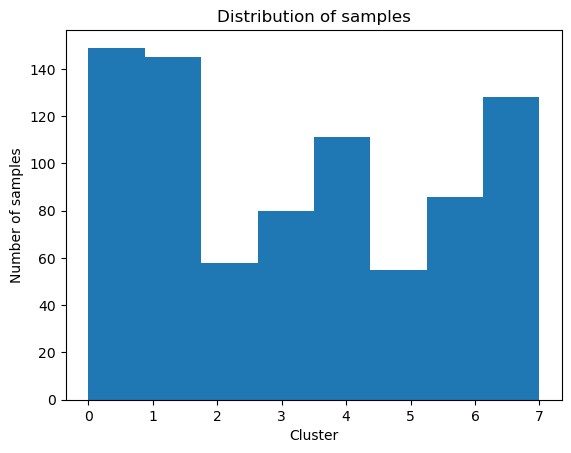

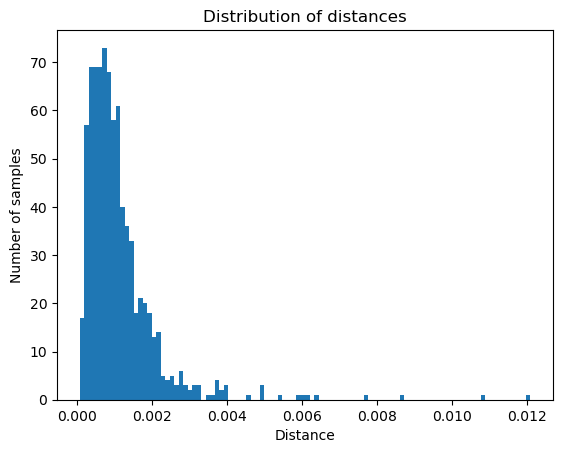

<Figure size 640x480 with 0 Axes>

In [57]:
# select N samples for initial modelling via kmeans clustering
# the distances to the cluster centers can be used to select the most
# informative samples for the initial training set

n_samples = len(X_train) // 100  # 1% of the training set
# // floor devision - rounds to the nearest whole number

from sklearn.cluster import KMeans

# alternatively the number of initial clusters can be defined manually
kmeans_clusters = 8

# define the kmeans model
kmeans = KMeans(n_clusters=n_samples, random_state=random_state)
# run the kmeans model on the training set
kmeans.fit(X_train)
# get the cluster centers
cluster_centers = kmeans.cluster_centers_

# calculate the distance of each sample to the cluster centers as
# squared (scaled) euclidean distance
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(X_train, cluster_centers, squared=True)

stepsize = 1

# return the indizes of the samples that are closest to the cluster centers
dist_sq_eu_argmin = np.argmin(distances, axis=1)

# plot the distribution of the samples
plt.hist(dist_sq_eu_argmin, bins=n_samples)
#
plt.title("Distribution of samples")
plt.xlabel("Cluster")
plt.ylabel("Number of samples")
plt.show()
# save the plot
plt.savefig(FIGURE_PATH + "/kmeans1.png")

# plot the distances of the samples to the cluster centers
plt.hist(np.min(distances, axis=1), bins=100)
plt.title("Distribution of distances")
plt.xlabel("Distance")
plt.ylabel("Number of samples")
plt.show()
plt.savefig(FIGURE_PATH + "/kmeans2.png")

In [58]:
# create a pca plot of the samples
from sklearn.decomposition import PCA

# store the explained variance ratio
explained_variance_ratio = []

for i in range(2, 10):
    pca = PCA(n_components=i, random_state=random_state)
    X_train_pca = pca.fit_transform(X_train)
    explained_variance_ratio.append(pca.explained_variance_ratio_)
    # retain the information if i == 2 for plotting 2 Dimensional PCA
    if i == 2:
        X_train_pca_2 = X_train_pca

# calculate the sum of explained var for each pca component

# show the table of explained variance ratio
explained_variance_ratio = pd.DataFrame(explained_variance_ratio)

explained_variance_ratio["explained_variance"] = explained_variance_ratio.sum(axis=1)

explained_variance_ratio.head(n=10)

,0,1,2,3,4,5,6,7,8,explained_variance
0,0.66171,0.132166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793877
1,0.66171,0.132166,0.088927,NaN,NaN,NaN,NaN,NaN,NaN,0.882804
2,0.66171,0.132166,0.088927,0.048838,NaN,NaN,NaN,NaN,NaN,0.931642
3,0.66171,0.132166,0.088927,0.048838,0.024036,NaN,NaN,NaN,NaN,0.955677
4,0.66171,0.132166,0.088927,0.048838,0.024036,0.016763,NaN,NaN,NaN,0.972440
5,0.66171,0.132166,0.088927,0.048838,0.024036,0.016763,0.00857,NaN,NaN,0.981011
6,0.66171,0.132166,0.088927,0.048838,0.024036,0.016763,0.00857,0.00648,NaN,0.987490
7,0.66171,0.132166,0.088927,0.048838,0.024036,0.016763,0.00857,0.00648,0.003337,0.990827


<function matplotlib.pyplot.show(close=None, block=None)>

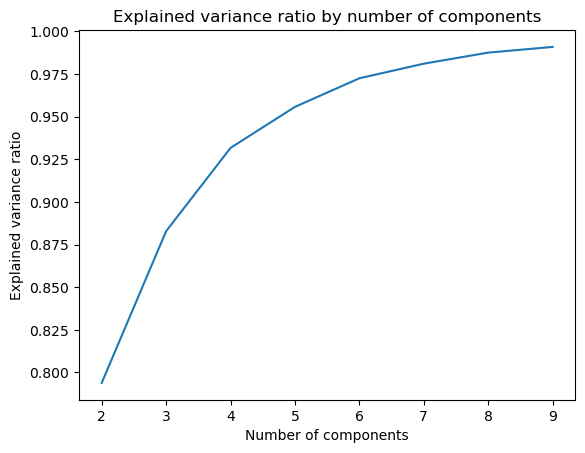

In [59]:
# create the elbow plot

# plot the sum of explained variance ratio against number of components
plt.plot(range(2, 10), explained_variance_ratio["explained_variance"])
plt.title("Explained variance ratio by number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")

plt.show

/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


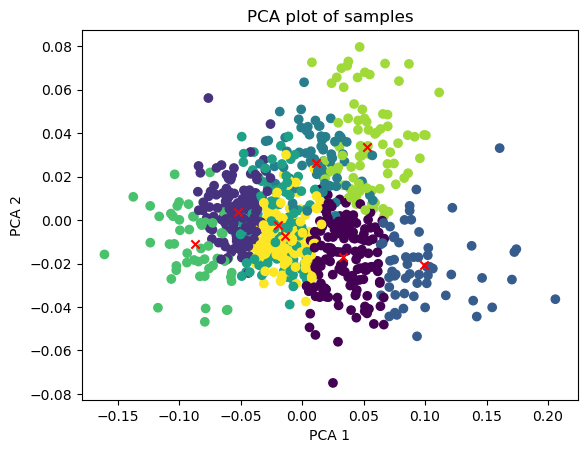

<Figure size 640x480 with 0 Axes>

In [60]:
# plot the distances from the cluster centers in 2D
# be aware that the cluster centers were calculated in the original feature space

plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=dist_sq_eu_argmin)
# highlight the cluster centers
plt.scatter(
    pca.transform(cluster_centers)[:, 0],
    pca.transform(cluster_centers)[:, 1],
    c="red",
    marker="x",
)
plt.title("PCA plot of samples")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
# save the plot
plt.savefig(FIGURE_PATH + "/pca_plot_1.png")

In [61]:
# dist_sq_eu_argmin is the index/name of the cluster center that is closest to each sample
unique, counts = np.unique(dist_sq_eu_argmin, return_counts=True)
unique, counts
# returns the number of samples in each cluster

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([149, 145,  58,  80, 111,  55,  86, 128]))

In [62]:
# retrive the indizes of the samples that are closest to each cluster center
id = []
initial_samples_sample_ids = []
for i in range(kmeans_clusters):
    id.append(np.where(dist_sq_eu_argmin == i)[0])

# get the first sample of each cluster
for i in range(kmeans_clusters):
    initial_samples_sample_ids.append(id[i][0])
initial_samples_sample_ids

[0, 5, 16, 3, 6, 4, 2, 31]

## Active learning step (first step)

##  Introduction

For each Active Learning we will start with an inital set of samples which allow to generate a model. Based on the employed strategy, additional samples will be added and the model updated. 

**Inital Models**  
[X] random samples  
[X] kmean cluster centers  

**Sampling strategies**  
[ ] random sampling  
[ ] euclidean distance  

In [63]:
# Inital model with random samples and pandas dataframes

from sklearn.cross_decomposition import PLSRegression
from al_lib.helper_functions import rmse_func

pls = PLSRegression()

params_pls = {"max_iter": 509, "n_components": 8} # 'max_iter': 509, 'n_components': 8
pls = PLSRegression(**params_pls)

X_Pool = X_train
y_Pool = y_train
n_samples = 8

X_Learned = None
y_Learned = None

X_Pool, X_Learned = train_test_split(
    X_Pool, test_size=n_samples, random_state=random_state
)
y_Pool, y_Learned = train_test_split(
    y_Pool, test_size=n_samples, random_state=random_state
)

pls.fit(X_Learned, y_Learned)
# calc initial rmse
y_pred = pls.predict(X_test)
rmse = rmse_func(y_test, y_pred)
print(f"Initial RMSE with random sampling: {rmse}, with {len(y_Learned)} samples")

Initial RMSE with random sampling: 263.0795131996814, with 8 samples


/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 7
  warnings.warn(f"Y residual is constant at iteration {k}")


## Active Learning with random sampling

To the initial model, additional samples will be added in a randomized way. This will be used later as baseline to compare strategies.

/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 7
  warnings.warn(f"Y residual is constant at iteration {k}")


Initial RMSE with random sampling: 263.0795131996814, with 8 samples
Final RMSE with random sampling: 124.41300914740391, with 108 samples


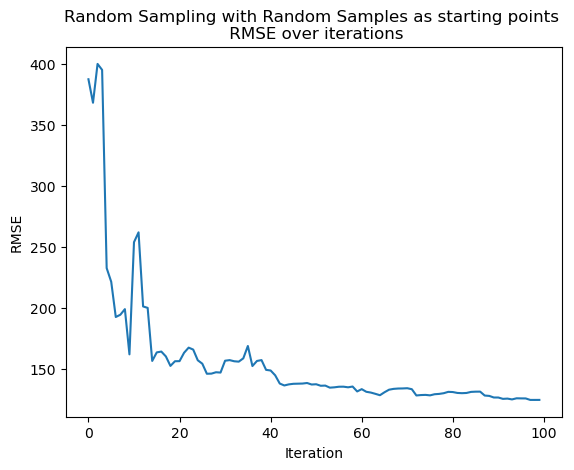

In [64]:
# Active Learning (PLS) with random sampling

pls = PLSRegression()

pls = PLSRegression(**params_pls)

X_Pool = X_train
y_Pool = y_train
n_samples = 8

X_Learned = None
y_Learned = None

X_Pool, X_Learned, y_Pool, y_Learned = train_test_split(
    X_Pool, y_Pool, test_size=n_samples, random_state=random_state
)

pls.fit(X_Learned, y_Learned)
# calc initial rmse
y_pred = pls.predict(X_test)
rmse = rmse_func(y_test, y_pred)
print(f"Initial RMSE with random sampling: {rmse}, with {len(y_Learned)} samples")

# define the number of iterations
n_iterations = 100

# define the number of samples to be selected in each iteration
n_samples_per_iteration = 1

# to track the samples, we will generate lists, with all the indexes

X_Learned_index = X_Learned.index
# these should be the same as the y_Learned index
y_Learned_index = y_Learned.index
X_Pool_index = X_Pool.index
y_Pool_index = y_Pool.index

rmse_sampling = np.zeros(n_iterations)

# Active Learning Loop
for it in range(n_iterations):
    # select a random sample from the pool by selecting a random index from X_Pool
    random_sample_index = np.random.choice(X_Pool.index)

    x_new = X_Pool.loc[[random_sample_index]]
    y_new = y_Pool.loc[[random_sample_index]]
    # add the sample to the learned set
    X_Learned = pd.concat([X_Learned, x_new])
    y_Learned = pd.concat([y_Learned, y_new])
    # remove the sample from the pool
    X_Pool = X_Pool.drop(index=random_sample_index)
    y_Pool = y_Pool.drop(index=random_sample_index)
    # retrain model on the new full data set and predict a new fit
    pls.fit(X_Learned, y_Learned)
    y_pred = pls.predict(X_test)
    rmse_sampling[it] = rmse_func(y_test, y_pred)
    # print(f"RMSE after iteration {it+1}: {rmse_sampling[it]}, with {len(y_Learned)} samples")

print(
    f"Final RMSE with random sampling: {rmse_sampling[-1]}, with {len(y_Learned)} samples"
)

# plot the rmse over the iterations
plt.plot(range(n_iterations), rmse_sampling)
plt.title(
    "Random Sampling with Random Samples as starting points \n RMSE over iterations"
)
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.show()

Initial RMSE with random sampling: 359.28188047544455, with 8 samples
Final RMSE with random sampling: 175.84345056058504, with 108 samples


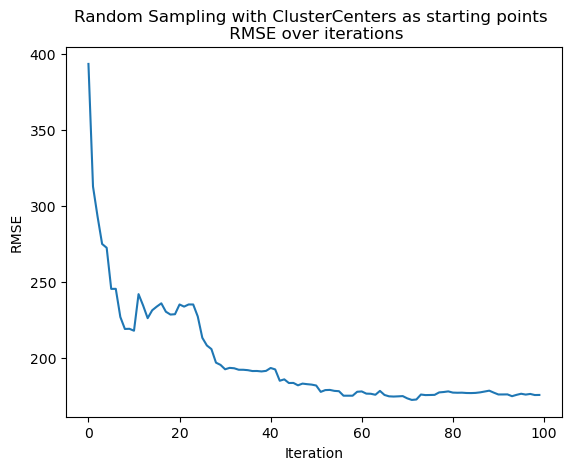

In [65]:
# Active Learning (PLS) with Cluster Centers as starting points
pls = PLSRegression()
params = {"n_components": 2}
pls = PLSRegression(**params)

X_Pool = X_train
y_Pool = y_train

X_Learned = None
y_Learned = None

# add the samples nearest to cluster centers to the learned set
X_Learned = X_Pool.iloc[initial_samples_sample_ids]
y_Learned = y_Pool.iloc[initial_samples_sample_ids]

# remove the samples from the pool
X_Pool = X_Pool.drop(X_Learned.index)
y_Pool = y_Pool.drop(y_Learned.index)

pls.fit(X_Learned, y_Learned)
# calc initial rmse
y_pred = pls.predict(X_test)
rmse_init = rmse_func(y_test, y_pred)
print(f"Initial RMSE with random sampling: {rmse_init}, with {len(y_Learned)} samples")

# define the number of iterations
n_iterations = 100

# define the number of samples to be selected in each iteration
n_samples_per_iteration = 1

# to track the samples, we will generate lists, with all the indexes
X_Learned_index = X_Learned.index
y_Learned_index = y_Learned.index
X_Pool_index = X_Pool.index
y_Pool_index = y_Pool.index

rmse_sampling = np.zeros(n_iterations)

# Active Learning Loop
for it in range(n_iterations):
    # select a random sample from the pool by selecting a random index from X_Pool
    random_sample_index = np.random.choice(X_Pool.index)
    x_new = X_Pool.loc[[random_sample_index]]
    y_new = y_Pool.loc[[random_sample_index]]
    # add the sample to the learned set
    X_Learned = pd.concat([X_Learned, x_new])
    y_Learned = pd.concat([y_Learned, y_new])
    # remove the sample from the pool
    X_Pool = X_Pool.drop(index=random_sample_index)
    y_Pool = y_Pool.drop(index=random_sample_index)
    # retrain model on the new full data set and predict a new fit
    pls.fit(X_Learned, y_Learned)
    y_pred = pls.predict(X_test)
    rmse_sampling[it] = rmse_func(y_test, y_pred)
    # print(f"RMSE after iteration {it+1}: {rmse_sampling[it]}, with {len(y_Learned)} samples")

print(
    f"Final RMSE with random sampling: {rmse_sampling[-1]}, with {len(y_Learned)} samples"
)

# plot the rmse over the iterations
plt.plot(range(n_iterations), rmse_sampling)
plt.title(
    "Random Sampling with ClusterCenters as starting points \n RMSE over iterations"
)
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.show()

# Active Learning with Exploration in the feature space

In [85]:
# PLS regression with random sampling as selection criterion

# Define the Input
# Data
X_Pool = X_train
y_Pool = y_train
# Model
pls = PLSRegression(**params_pls)
# starting samples (optional)

# selection_criteria is "random"

# Number of iterations of active learning
n_iterations = 50

def pls_random(X_train, y_train, n_iterations, params_pls, n_samples_per_it = None):
    """
    Function to perform PLS regression with random sampling as selection criterion
    """
    if n_samples_per_it is None:
        n_samples_per_it = 1
    # initialize the model
    # Define the Input
    # Data
    X_Pool = X_train
    y_Pool = y_train
    # Model
    pls = PLSRegression(**params_pls)
    # starting samples (optional)

    # selection_criteria = "random"

    # Number of iterations of active learning
    n_iterations = 100

    # Define the Output
    # RMSE for each iteration
    # Index of the samples selected in each iteration

    rmse_sampling = np.zeros(n_iterations)
    samples_selected = np.zeros(n_iterations)

    # Active Learning Loop
    for it in range(n_iterations):
        # select a random sample from the pool by selecting a random index from X_Pool
        random_sample_index = np.random.choice(X_Pool.index)
        samples_selected[it] = random_sample_index

        x_new = X_Pool.loc[[random_sample_index]]
        y_new = y_Pool.loc[[random_sample_index]]

        # if it = 0, initialize the learned set as empty
        if it == 0:
            X_Learned = pd.DataFrame()
            y_Learned = pd.DataFrame()

        # add the sample to the learned set
        X_Learned = pd.concat([X_Learned, x_new])
        y_Learned = pd.concat([y_Learned, y_new])
        # remove the sample from the pool
        X_Pool = X_Pool.drop(index=random_sample_index)
        y_Pool = y_Pool.drop(index=random_sample_index)
        # retrain model on the new full data set and predict a new fit, if the n_samples_per_it is reached
        if n_samples_per_it == None:
            pls.fit(X_Learned, y_Learned)
            y_pred = pls.predict(X_test)
            rmse_sampling[it] = rmse_func(y_test, y_pred)
            # print(f"RMSE after iteration {it+1}: {rmse_sampling[it]}, with {len(y_Learned)} samples")
        if it % n_samples_per_it == 0 and it != 0:
            pls.fit(X_Learned, y_Learned)
            y_pred = pls.predict(X_test)
            rmse_sampling[it] = rmse_func(y_test, y_pred)
            # print(f"RMSE after iteration {it+1}: {rmse_sampling[it]}, with {len(y_Learned)} samples")
        # print(f"RMSE after iteration {it+1}: {rmse_sampling[it]}, with {len(y_Learned)} samples")

    print(
        f"Final RMSE with random sampling: {rmse_sampling[-1]}, with {len(y_Learned)} samples"
    )

    # calc the rmse for the model including all train data
    pls.fit(X_train, y_train)
    y_pred = pls.predict(X_test)
    rmse_full = rmse_func(y_test, y_pred)
    print(f"RMSE with all training samples: {rmse_full} (with {len(y_train)}) samples")

    # plot the rmse over the iterations
    plt.plot(range(n_iterations)[1:], rmse_sampling[1:])
    # add a line for the model with all training samples
    plt.axhline(y=rmse_full, color="r", linestyle="--")
    plt.title(
        "Random Sampling with PLS Model \n RMSE over iterations"
    )
    plt.xlabel("Iteration")
    plt.ylabel("RMSE")
    plt.show()

    # create a plot of the rmse as accuracy over the iterations

    #define max acc as rmse_full
    max_acc = rmse_full
    # calculate the accuracy for each iteration
    rmse_acc = max_acc - rmse_sampling
    # plot the accuracy over the iterations
    plt.plot(range(n_iterations)[1:], rmse_acc[1:])
    plt.axhline(y=0, color="r", linestyle="--") # rmse_full == max_acc
    plt.xlim(1, n_iterations)
    plt.ylim(np.min(rmse_acc) ,0+10)
    plt.title(
        "Random Sampling with PLS Model\n Random Samples as starting points \n RMSE over iterations"
    )
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
    return rmse_sampling, samples_selected


/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 1
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 2
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 3
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 4
  warnings.warn(f"Y residual is constant at iteration {k}")
/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls

Final RMSE with random sampling: 139.54051123136256, with 100 samples
RMSE with all training samples: 117.68331674399462 (with 812) samples


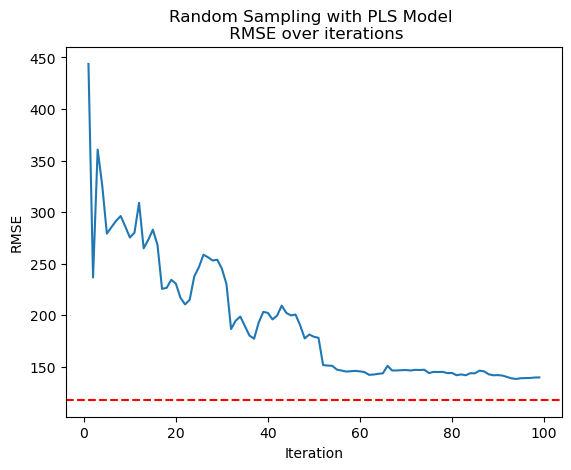

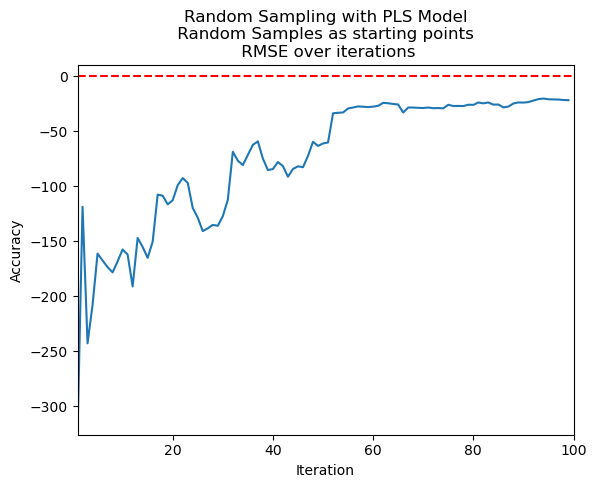

(array([  0.        , 443.74313461, 236.49078604, 360.64965782,
        325.67052688, 279.07189701, 285.31926284, 291.41280455,
        296.13651091, 286.06603601, 275.30772193, 279.90937608,
        308.9287011 , 264.81310534, 273.02382965, 282.93035339,
        268.16899229, 225.44343433, 226.43072828, 234.25712515,
        230.53116998, 216.80544655, 210.35870365, 214.80222683,
        237.60634541, 246.45481986, 258.61896163, 256.07538707,
        252.9619662 , 253.76534754, 245.04646547, 230.0308776 ,
        186.44949816, 194.58222646, 198.58774721, 189.31035057,
        180.1425204 , 177.06457944, 192.72845392, 203.08920523,
        202.17666269, 195.80280585, 199.49403644, 209.16908012,
        202.13115845, 199.68476224, 200.5253127 , 190.24827336,
        177.40334356, 181.13174765, 178.94743983, 177.98524902,
        151.48853836, 151.02921726, 150.72993125, 147.08218003,
        146.21009341, 145.23423958, 145.50677491, 145.84982256,
        145.43017262, 144.69438854, 141.

In [86]:
pls_random(X_Pool, y_Pool, 50, params_pls = params_pls) 

In [68]:
# retrain the model on random samples

# Active Learning (PLS) with Cluster Centers as starting points
pls = PLSRegression()
pls = PLSRegression(**params_pls)

X_Pool = X_train
y_Pool = y_train

X_Learned = None
y_Learned = None

# add the samples nearest to cluster centers to the learned set
X_Learned = X_Pool.iloc[initial_samples_sample_ids]
y_Learned = y_Pool.iloc[initial_samples_sample_ids]

# remove the samples from the pool
X_Pool = X_Pool.drop(X_Learned.index)
y_Pool = y_Pool.drop(y_Learned.index)

pls.fit(X_Learned, y_Learned)
# calc initial rmse
y_pred = pls.predict(X_test)
rmse = rmse_func(y_test, y_pred)
print(f"Initial RMSE with random sampling: {rmse}, with {len(y_Learned)} samples")

selection_criteria = euclidean_distances(X_Pool, cluster_centers, squared=True)

# define the number of iterations
n_iterations = 5

# define the number of samples to be selected in each iteration
n_samples_per_iteration = 1

# to track the samples, we will generate lists, with all the indexes
X_Learned_index = X_Learned.index
y_Learned_index = y_Learned.index
X_Pool_index = X_Pool.index
y_Pool_index = y_Pool.index

rmse_sampling = np.zeros(n_iterations)

# Active Learning Loop
for it in range(n_iterations):
    # identify the sample with the highest distance to the cluster centers
    distances = euclidean_distances(X_Pool, cluster_centers, squared=True)
        # returns a ndarray of shape (n_samples_X, n_samples_Y)
    # calculate the sum of all destances for each sample in X_Pool
    distance_sum = np.sum(distances, axis=1) # axis = 0 for columns, axis = 1 for rows
    # get the index of the sample with the highest overall distance
    sample_index = np.argmax(distance_sum)
    # get the sample
    x_new = X_Pool.iloc[sample_index]
    y_new = sample_index, y_Pool.iloc[sample_index]
    # add the sample to the learned set
    # X_Learned = pd.concat([X_Learned, x_new])
    # X_Learned.append(x_new)
    print ("x_new:", x_new.shape)
    print("y_new", y_new)
    break
    # change y_new to fit y_Learned
    y_new = pd.Series(y_new).T
    # add y_new to y_Learned
    y_Learned = pd.concat([y_Learned, y_new])

    # rename the columns to fit the y_Learned dataframe
    # add the sample to the learned set with (index, value)
    # y_Learned = pd.merge(y_Learned, y_new, how='outer')
print(type(y_Learned))
print(type(y_new))

# # get the index of the sample with the highest overall distance
# sample_index = pd.argmax(distance_sum)
# # get the sample
# x_new = X_Pool.loc[:, :].iloc[sample_index, :]
# # get the y value for the sample inlcuding the index
# print(sample_index)
# #remove the sample from the pool
# X_Pool = X_Pool.drop(index=sample_index)

Initial RMSE with random sampling: 588.099835797161, with 8 samples
x_new: (410,)
y_new (62, 1826)
<class 'pandas.core.series.Series'>
<class 'tuple'>


/home/fhwn.ac.at/202375/.conda/envs/thesis/lib/python3.12/site-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 7
  warnings.warn(f"Y residual is constant at iteration {k}")


In [69]:
# add x_new to X_Learned
print(f"lenght of X_Learned: {len(X_Learned)}")
# reshape x_new to the shape of X_Learned
x_new = x_new.to_frame().T
X_Learned = pd.concat([X_Learned, x_new], axis=0)
print(f"lenght of X_Learned: {len(X_Learned)}")
x_new
# X_Pool
# X_Learned

lenght of X_Learned: 8
lenght of X_Learned: 9


,2970,2968,2966,2964,2962,2960,2959,2957,2955,2953,...,818,816,814,812,810,808,806,804,802,800
933,0.020051,0.020281,0.020498,0.020693,0.020873,0.021054,0.021253,0.02148,0.021737,0.022005,...,-0.025548,-0.025507,-0.025481,-0.025471,-0.025473,-0.02548,-0.025497,-0.025534,-0.025589,-0.025655


In [70]:
# select the y_new with index and value
type(sample_index)
# modify the type of sample_index to int


# y_new = y_Pool.iloc[[]]

numpy.int64

In [71]:
a = pd.DataFrame(distance_sum)
a.sort_values(by=0, ascending=False)
# get the index

# get the sample with the sample index
b = X_Pool.loc[:, :].iloc[sample_index, :]
# get the y value
c = y_Pool.iloc[sample_index]

# add the sample to the learned set
# X_Learned = pd.concat([X_Learned, x_new])
type(y_Learned)
type(c)
y_Learned

839     1944
353     1264
931     1778
429     1409
88      1710
506     1818
584     1806
1209    1981
Name: year, dtype: int64

In [72]:
# identify the sample with the highest distance to the cluster centers
selection_criteria = euclidean_distances(X_Pool, cluster_centers, squared=True)
# print(selection_criteria.shape)
# calculate the sum of all destinces for each sample
selection_criteria_sum = np.sum(selection_criteria, axis=1)
# get the index of the sample with the highest overall distance
sample_index = np.argmax(selection_criteria_sum)
# get the sample
# print(sample_index)
# print(X_Pool)
sample = X_Pool.loc[:, :].iloc[sample_index, :]
print(sample)

2970    0.020051
2968    0.020281
2966    0.020498
2964    0.020693
2962    0.020873
          ...   
808    -0.025480
806    -0.025497
804    -0.025534
802    -0.025589
800    -0.025655
Name: 933, Length: 410, dtype: float64
